In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('drive')
pd.set_option('display.max_columns', None) #Mostrar todas las columnas

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


 # Extrayendo informacion de Eventos de pelea del UFC
 

In [ ]:
df_all_events_ufc = pd.read_csv (r'/content/drive/MyDrive/UFC/all_events_ufc.csv')
df_all_events_ufc.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df_all_events_ufc.Location.value_counts()

Las Vegas, Nevada, USA                        194
Abu Dhabi, Abu Dhabi, United Arab Emirates     14
London, England, United Kingdom                12
Atlantic City, New Jersey, USA                  9
Houston, Texas, USA                             9
                                             ... 
Kansas City, Missouri, USA                      1
Uniondale, New York, USA                        1
Saitama, Saitama, Japan                         1
Gdansk, Poland                                  1
Casper, Wyoming, USA                            1
Name: Location, Length: 167, dtype: int64

La mayoria de peleadores han peleado en las Vegas

In [ ]:
df_all_events_ufc.date.value_counts()

                          August 23, 2014       2
                          June 28, 2014         2
                          October 04, 2014      2
                          November 19, 2016     2
                          May 31, 2014          2
                                               ..
                          September 16, 2017    1
                          September 09, 2017    1
                          September 02, 2017    1
                          August 05, 2017       1
                          March 11, 1994        1
Name: date, Length: 607, dtype: int64

Maximo se han realizado 2 eventos por noche y son muy  pocas las ocaciones 


# checking infromation on ufc fights

In [ ]:
df_ufc_fights = pd.read_csv (r'/content/drive/MyDrive/UFC/ufc_fights.csv')
df_ufc_fights.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df_ufc_fights=df_ufc_fights.rename(columns={'kd_1':'knock_down_but_W',
                              'kd_2':'knock_down_and_L',
                              'figther_1':'winner',
                              'figther_2':'losser',
                              'str_1':'significant strikes_W',
                              'str_2':'significant strikes_L',
                              'sub_1':'subs_W',
                              'sub_2':'subs_L',
                              'td_1':'takedown_W',
                              'td_2':'takedown_L'                            
                             }) 


In [ ]:
df_ufc_fights

,winner,losser,knock_down_but_W,knock_down_and_L,significant strikes_W,significant strikes_L,takedown_W,takedown_L,subs_W,subs_L,weight class,method,round,time,link,Location,name,date
0,Yair Rodriguez,Brian Ortega,0,0,22,23,1,0,0,0,Featherweight,KO/TKO,1,4:11,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,"July 16, 2022"
1,Amanda Lemos,Michelle Waterson-Gomez,0,0,29,20,1,0,0,1,Women's Strawweight,SUB Guillotine Choke,2,1:48,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,"July 16, 2022"
2,Li Jingliang,Muslim Salikhov,0,1,23,38,1,1,0,0,Welterweight,KO/TKO Punches,2,4:38,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,"July 16, 2022"
3,Matt Schnell,Sumudaerji,1,0,58,47,0,2,0,2,Flyweight,SUB Triangle Choke,2,4:24,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,"July 16, 2022"
4,Shane Burgos,Charles Jourdain,0,0,113,42,0,2,0,3,Featherweight,M-DEC,3,5:00,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,"July 16, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Orlando Wiet,Robert Lucarelli,0,0,2,8,1,0,1,0,Open Weight,KO/TKO,1,2:50,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,"March 11, 1994"
6713,Frank Hamaker,Thaddeus Luster,0,0,0,2,0,1,0,3,Open Weight,SUB Keylock,1,4:52,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,"March 11, 1994"
6714,Johnny Rhodes,David Levicki,0,0,4,11,0,1,0,0,Open Weight,KO/TKO Punches,1,12:13,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,"March 11, 1994"
6715,Patrick Smith,Ray Wizard,0,0,1,1,0,0,0,1,Open Weight,SUB Guillotine Choke,1,0:58,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,"March 11, 1994"


In [ ]:
df_ufc_fights['date']=df_ufc_fights['date'].str.strip()

In [ ]:
df_ufc_fights['date'][0]

'July 16, 2022'

In [ ]:
df_ufc_fights[df_ufc_fights['date'].str.find('15, 2010')!=-1]

,winner,losser,knock_down_but_W,knock_down_and_L,significant strikes_W,significant strikes_L,takedown_W,takedown_L,subs_W,subs_L,weight class,method,round,time,link,Location,name,date
5274,Nate Marquardt,Rousimar Palhares,0,0,1,13,0,0,1,1,Middleweight,KO/TKO Punches,1,3:28,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5275,Charles Oliveira,Efrain Escudero,0,0,13,35,0,2,0,1,Lightweight,SUB Rear Naked Choke,3,2:25,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5276,Jim Miller,Gleison Tibau,0,0,23,29,4,0,0,2,Lightweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5277,Cole Miller,Ross Pearson,0,1,26,24,0,1,0,1,Lightweight,SUB Rear Naked Choke,2,1:49,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5278,Yves Edwards,John Gunderson,0,0,15,54,0,1,2,1,Lightweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5279,Kyle Kingsbury,Jared Hamman,0,0,88,79,0,9,0,0,Light Heavyweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5280,David Branch,Tomasz Drwal,0,0,10,15,0,3,0,0,Middleweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5281,Rich Attonito,Rafael Natal,0,1,28,25,2,0,0,0,Middleweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5282,TJ Waldburger,David Mitchell,0,0,13,37,2,6,6,7,Welterweight,U-DEC,3,5:00,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"
5283,Brian Foster,Forrest Petz,0,1,1,17,0,0,0,0,Welterweight,KO/TKO Punches,1,1:07,http://ufcstats.com/event-details/acff43770762...,"Austin, Texas, USA",UFC Fight Night: Marquardt vs Palhares\n ...,"September 15, 2010"


In [ ]:
df_ufc_fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   winner                 6717 non-null   object
 1   losser                 6717 non-null   object
 2   knock_down_but_W       6717 non-null   object
 3   knock_down_and_L       6717 non-null   object
 4   significant strikes_W  6717 non-null   object
 5   significant strikes_L  6717 non-null   object
 6   takedown_W             6717 non-null   object
 7   takedown_L             6717 non-null   object
 8   subs_W                 6717 non-null   object
 9   subs_L                 6717 non-null   object
 10  weight class           6717 non-null   object
 11  method                 6717 non-null   object
 12  round                  6717 non-null   int64 
 13  time                   6717 non-null   object
 14  link                   6717 non-null   object
 15  Location             

## winners analysis 

In [ ]:
df_ufc_fights.winner.describe()

count           6717
unique          1575
top       Jim Miller
freq              25
Name: winner, dtype: object

In [ ]:
df_ufc_fights.winner.value_counts().head(30) #Agregar #peleas ganadas por peleador 

Jim Miller            25
Andrei Arlovski       24
Donald Cerrone        24
Demian Maia           22
Charles Oliveira      21
Michael Bisping       20
Rafael Dos Anjos      20
Georges St-Pierre     20
Jon Jones             20
Dustin Poirier        20
Diego Sanchez         19
Neil Magny            19
Frankie Edgar         19
Max Holloway          19
Anderson Silva        18
Matt Hughes           18
Francisco Trinaldo    18
Derrick Lewis         17
Clay Guida            17
Darren Elkins         17
Glover Teixeira       16
Gleison Tibau         16
Beneil Dariush        16
Vitor Belfort         16
Frank Mir             16
Demetrious Johnson    16
Matt Brown            16
Randy Couture         16
Edson Barboza         16
Chuck Liddell         16
Name: winner, dtype: int64

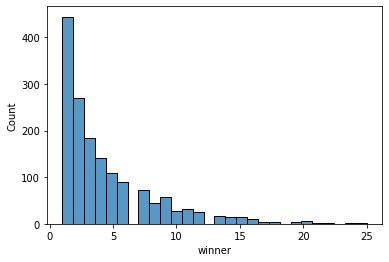

In [ ]:
a=df_ufc_fights.winner.value_counts()
sns.histplot(a)

## lossers analysis 

In [ ]:
df_ufc_fights.losser.describe()

count                             6717
unique                            2170
top                    Jeremy Stephens
freq                                19
Name: losser, dtype: object

In [ ]:
df_ufc_fights.losser.value_counts().head(30) # Agregar # peleas perdidas por peleador 

             Jeremy Stephens       19
             Clay Guida            16
             Jim Miller            15
             Donald Cerrone        14
             Andrei Arlovski       14
             Michael Johnson       14
             BJ Penn               13
             Sam Alvey             13
             Joshua Burkman        13
             Ross Pearson          13
             Diego Sanchez         13
             Matt Brown            13
             Tito Ortiz            12
             Joe Lauzon            12
             Tim Boetsch           12
             Angela Hill           12
             Rafael Dos Anjos      12
             Thiago Alves          12
             Gleison Tibau         12
             Nate Marquardt        12
             Ed Herman             12
             Jessica Eye           11
             Mauricio Rua          11
             Sam Stout             11
             Frank Mir             11
             Tim Means             11
            

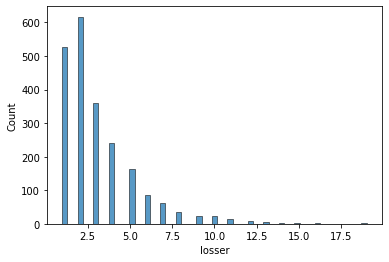

In [ ]:
a=df_ufc_fights.losser.value_counts()
sns.histplot(a)

##knockdowns

In [ ]:
df_ufc_fights['knock_down_but_W'].value_counts(normalize=True)#winers 

           0     0.938663
           1     0.052553
           2     0.005360
           --    0.003126
           3     0.000298
Name: knock_down_but_W, dtype: float64

it goes from 0 to 3 and is really dificult to be in number 1 so 3 is almost imposible 

In [ ]:
df_ufc_fights['knock_down_and_L'].value_counts(normalize=True)#winers 

0                            0.688849
1                            0.261277
2                            0.038708
3                            0.006699
--                           0.003126
4                            0.001042
5                            0.000298
Name: knock_down_and_L, dtype: float64

it is  more usual to be on the losing side when it comes to kd,  30% of fights  the lossing part has suffered any tipe of kd 

## Significant Strikes

In [ ]:
df_ufc_fights['significant strikes_W'].describe()

count             6717
unique             158
top                  1
freq               284
Name: significant strikes_W, dtype: object

In [ ]:
df_ufc_fights['significant strikes_W'].value_counts().head(20)

           1     284
           0     260
           2     231
           6     198
           4     196
           3     190
           5     178
           7     159
           9     142
           8     141
           11    135
           10    134
           13    132
           17    131
           12    124
           18    115
           20    115
           16    115
           15    113
           14    112
Name: significant strikes_W, dtype: int64

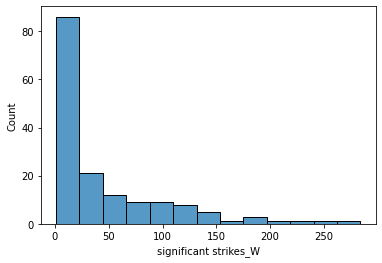

In [ ]:
a=df_ufc_fights['significant strikes_W'].value_counts()
sns.histplot(a)

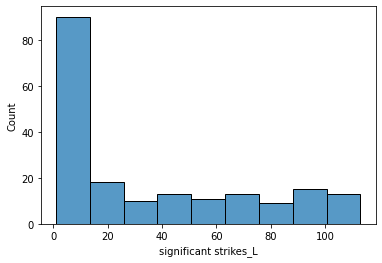

In [ ]:
a=df_ufc_fights['significant strikes_L'].value_counts()
sns.histplot(a)

In [ ]:
df_ufc_fights['significant strikes_L'].describe()

count                          6717
unique                          192
top       13                       
freq                            113
Name: significant strikes_L, dtype: object

In [ ]:
df_ufc_fights['significant strikes_L'].value_counts().head(30)

13                           113
6                            112
10                           112
20                           112
25                           110
9                            109
17                           109
12                           108
14                           107
5                            105
24                           103
36                           102
4                            101
21                           100
18                           100
8                            100
19                            99
15                            96
32                            96
3                             95
22                            94
26                            94
27                            92
11                            91
7                             90
2                             89
23                            89
42                            89
31                            88
28                            88
Name: sign

## Takedown 

In [ ]:
df_ufc_fights.takedown_W.describe().to_frame()

,takedown_W
count,6717
unique,12
top,0
freq,4298


In [ ]:
a=df_ufc_fights.takedown_W.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

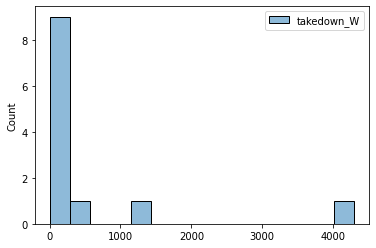

In [ ]:
a=df_ufc_fights.takedown_W.value_counts().to_frame().reset_index().rename(columns={'index':'#'})
sns.histplot(a)

In [ ]:
df_ufc_fights.takedown_L.value_counts()

0                            2931
1                            1484
2                             844
3                             533
4                             332
5                             242
6                             142
7                              74
8                              43
9                              27
--                             21
10                             18
11                             12
12                              8
14                              2
13                              2
21                              1
16                              1
Name: takedown_L, dtype: int64

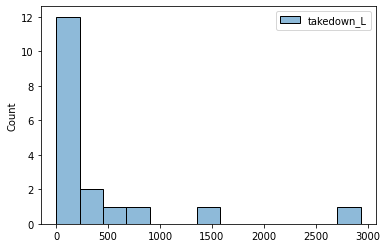

In [ ]:
a=df_ufc_fights.takedown_L.value_counts().to_frame().reset_index().rename(columns={'index':'#'})
sns.histplot(a)

## SUBS

In [ ]:
df_ufc_fights.subs_W.describe()

count             6717
unique               9
top                  0
freq              5609
Name: subs_W, dtype: object

In [ ]:
df_ufc_fights.subs_L.describe()

count                         6717
unique                          12
top       0                       
freq                          4399
Name: subs_L, dtype: object

In [ ]:
df_ufc_fights.subs_W.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,subs_W
0,0,5609
1,1,672
2,2,264
3,3,96
4,4,34
5,--,21
6,5,15
7,7,4
8,6,2


In [ ]:
df_ufc_fights.subs_L.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,subs_L
0,0,4399
1,1,1462
2,2,532
3,3,189
4,4,64
5,5,27
6,--,21
7,6,11
8,7,8
9,8,2


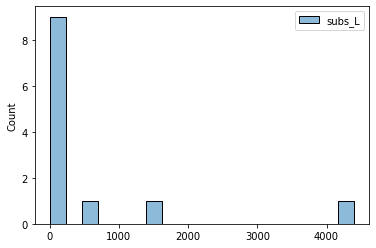

In [ ]:
a=df_ufc_fights.subs_L.value_counts().to_frame().reset_index().rename(columns={'index':'#'})
sns.histplot(a)

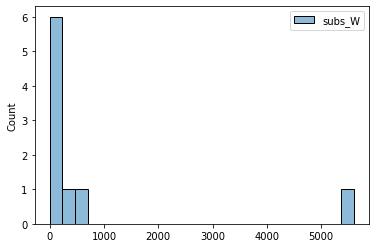

In [ ]:
a=df_ufc_fights.subs_W.value_counts().to_frame().reset_index().rename(columns={'index':'#'})
sns.histplot(a)

## Weigh Class

In [ ]:
df_ufc_fights['weight class'].describe()

count            6717
unique             15
top       Lightweight
freq             1188
Name: weight class, dtype: object

In [ ]:
df_ufc_fights['weight class'].value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,weight class
0,Lightweight,1188
1,Welterweight,1166
2,Middleweight,905
3,Heavyweight,636
4,Featherweight,631
5,Light Heavyweight,613
6,Bantamweight,554
7,Flyweight,263
8,Women's Strawweight,237
9,Women's Bantamweight,170


## Method 

In [ ]:
df_ufc_fights.method.describe()

count      6717
unique       71
top       U-DEC
freq       2354
Name: method, dtype: object

In [ ]:
df_ufc_fights.method.value_counts().to_frame().reset_index().rename(columns={'index':'#'}).head(30)

,#,method
0,U-DEC,2354
1,KO/TKO Punches,825
2,KO/TKO Punch,738
3,S-DEC,643
4,SUB Rear Naked Choke,502
5,SUB Guillotine Choke,238
6,SUB Armbar,171
7,KO/TKO Kick,162
8,KO/TKO,147
9,KO/TKO Elbows,108


## Round

In [ ]:
df_ufc_fights['round'].describe()

count    6717.000000
mean        2.327676
std         1.015205
min         1.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: round, dtype: float64

In [ ]:
df_ufc_fights['round'].value_counts(normalize=True).to_frame().reset_index().rename(columns={'index':'#'})

,#,round
0,3,0.501414
1,1,0.292095
2,2,0.165252
3,5,0.035879
4,4,0.005360


## Time

In [ ]:
df_ufc_fights.time.describe()

count     6717
unique     339
top       5:00
freq      3123
Name: time, dtype: object

In [ ]:
time= pd.DataFrame(columns=['minunte','second'])
time[['minute','second']]=df_ufc_fights['time'].str.split(':',expand=True)

In [ ]:
time['minute'].describe()

count     6717
unique      17
top          5
freq      3131
Name: minute, dtype: object

In [ ]:
time['minute'].value_counts(normalize=True).to_frame().reset_index().rename(columns={'index':'#'})

,#,minute
0,5,0.466131
1,2,0.117165
2,1,0.115677
3,4,0.114337
4,3,0.102724
5,0,0.078011
6,9,0.001191
7,10,0.000893
8,12,0.000893
9,7,0.000596


The first 5 minutes is usually when the combats stops 

## Location

In [ ]:
df_ufc_fights.Location.describe()

count                       6717
unique                       167
top       Las Vegas, Nevada, USA
freq                        2058
Name: Location, dtype: object

In [ ]:
df_ufc_fights.Location.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,Location
0,"Las Vegas, Nevada, USA",2058
1,"Abu Dhabi, Abu Dhabi, United Arab Emirates",171
2,"London, England, United Kingdom",126
3,"Houston, Texas, USA",108
4,"Anaheim, California, USA",95
...,...,...
162,"San Juan, Puerto Rico",9
163,"Bossier City, Louisiana, USA",8
164,"Miami, Florida, USA",8
165,"Chiba, Japan",7


## name

In [ ]:
df_ufc_fights.name.describe()

count                                            6717
unique                                            612
top       UFC 2: No Way Out\n                        
freq                                               15
Name: name, dtype: object

In [ ]:
df_ufc_fights.name.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,name
0,UFC 2: No Way Out\n,15
1,UFC Fight Night: Whittaker vs. Till\n ...,15
2,UFC 259: Blachowicz vs. Adesanya\n ...,15
3,UFC Fight Night: Santos vs. Ankalaev\n ...,14
4,UFC Fight Night: Joanna vs. Waterson\n ...,14
...,...,...
607,UFC 28: High Stakes\n,7
608,UFC 29: Defense of the Belts\n ...,7
609,UFC 25: Ultimate Japan 3\n ...,6
610,UFC 3: The American Dream\n ...,6


## date

In [ ]:
df_ufc_fights['date']=pd.to_datetime(df_ufc_fights['date'])

In [ ]:
df_ufc_fights.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6717
unique                    607
top       2016-11-19 00:00:00
freq                       25
first     1994-03-11 00:00:00
last      2022-07-16 00:00:00
Name: date, dtype: object

In [ ]:
df_ufc_fights.date.value_counts().to_frame().reset_index().rename(columns={'index':'#'})

,#,date
0,2016-11-19,25
1,2014-10-04,23
2,2014-05-31,22
3,2014-06-28,21
4,2014-08-23,21
...,...,...
602,2000-11-17,7
603,2000-12-16,7
604,2000-04-14,6
605,1994-09-09,6


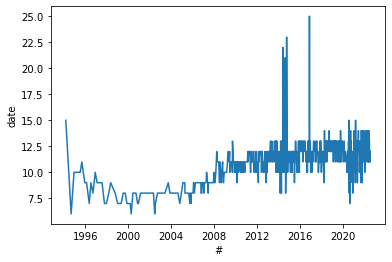

In [ ]:
a=df_ufc_fights.date.value_counts().to_frame().reset_index().rename(columns={'index':'#'})
sns.lineplot(x='#',y='date',data=a)


# UFC Fighters

In [ ]:
df_ufc_fighters = pd.read_csv (r'/content/drive/MyDrive/UFC/ufc_fighters.csv')
#df_ufc_fighters.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df_ufc_fighters['name']=df_ufc_fighters['First']+' '+df_ufc_fighters['Last'] # creating new full name index

In [ ]:
df_ufc_fighters.drop(columns=['First','Last','Unnamed: 0'],inplace=True)

In [ ]:
df_ufc_fighters

,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt,name
0,NaN,--,155 lbs.,--,NaN,5,3,0,NaN,Tom Aaron
1,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,NaN,Danny Abbadi
2,NaN,"5' 8""",155 lbs.,--,NaN,27,3,0,NaN,Nariman Abbasov
3,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,NaN,David Abbott
4,The Hammer,"6' 2""",261 lbs.,--,NaN,5,0,0,NaN,Hamdy Abdelwahab
...,...,...,...,...,...,...,...,...,...,...
7966,NaN,--,170 lbs.,--,NaN,5,7,0,NaN,Dave Zitanick
7967,NaN,--,145 lbs.,--,NaN,6,3,0,NaN,Alex Zuniga
7968,NaN,"5' 9""",185 lbs.,--,NaN,3,1,0,NaN,George Zuniga
7969,Tigre,"5' 7""",155 lbs.,"70.0""",Orthodox,13,1,0,NaN,Allan Zuniga


# ufc_figthers_data

In [ ]:
df_ufc_fighters_data= pd.read_csv (r'/content/drive/MyDrive/UFC/ufc_fighters_data.csv')

In [ ]:
df_ufc_fighters_data.drop(columns=['Unnamed: 0','index',' '],inplace=True)
df_ufc_fighters_data.columns=['Significant Strikes Landed per Minute',
                           'Significant Striking Accuracy',
                           'Significant Strikes Absorbed per Minute',
                           'the % of opponents strikes that did not land)',
                           'Average Takedowns Landed per 15 minutes',
                           'takedown Accuracy',
                           'the % of opponents TD attempts that did not land',
                           'Average Submissions Attempted per 15 minutes',
                           'name',
                           'record']

In [ ]:
df_ufc_fighters_data.drop(columns=['record'],inplace=True)

In [ ]:
df_ufc_fighters_data

,Significant Strikes Landed per Minute,Significant Striking Accuracy,Significant Strikes Absorbed per Minute,the % of opponents strikes that did not land),Average Takedowns Landed per 15 minutes,takedown Accuracy,the % of opponents TD attempts that did not land,Average Submissions Attempted per 15 minutes,name
0,0.00,0%,0.00,0%,0.00,0%,0%,0.0,Tom Aaron
1,3.29,38%,4.41,57%,0.00,0%,77%,0.0,Danny Abbadi
2,0.00,0%,0.00,0%,0.00,0%,0%,0.0,Nariman Abbasov
3,1.35,30%,3.55,38%,1.07,33%,66%,0.0,David Abbott
4,0.00,0%,0.00,0%,0.00,0%,0%,0.0,Hamdy Abdelwahab
...,...,...,...,...,...,...,...,...,...
3868,0.00,0%,0.00,0%,0.00,0%,0%,0.0,Dave Zitanick
3869,0.00,0%,0.00,0%,0.00,0%,0%,0.0,Alex Zuniga
3870,7.64,38%,5.45,37%,0.00,0%,100%,0.0,George Zuniga
3871,3.93,52%,1.80,61%,0.00,0%,57%,1.0,Allan Zuniga


In [ ]:
df_ufc_fighters.name[0]

'Tom Aaron'

In [ ]:
df_ufc_fighters_data.name=df_ufc_fighters_data.name.str.strip()

In [ ]:
df_ufc_fighters_data.name[0]

'Tom Aaron'

# merge_1

In [ ]:
df_ufc_fighters_full_data=df_ufc_fighters.merge(df_ufc_fighters_data,on='name',how='left')

In [ ]:
df_ufc_fighters_full_data

,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt,name,Significant Strikes Landed per Minute,Significant Striking Accuracy,Significant Strikes Absorbed per Minute,the % of opponents strikes that did not land),Average Takedowns Landed per 15 minutes,takedown Accuracy,the % of opponents TD attempts that did not land,Average Submissions Attempted per 15 minutes
0,NaN,--,155 lbs.,--,NaN,5,3,0,NaN,Tom Aaron,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,NaN,Danny Abbadi,3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,NaN,"5' 8""",155 lbs.,--,NaN,27,3,0,NaN,Nariman Abbasov,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,NaN,David Abbott,1.35,30%,3.55,38%,1.07,33%,66%,0.0
4,The Hammer,"6' 2""",261 lbs.,--,NaN,5,0,0,NaN,Hamdy Abdelwahab,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,NaN,--,170 lbs.,--,NaN,5,7,0,NaN,Dave Zitanick,0.00,0%,0.00,0%,0.00,0%,0%,0.0
7987,NaN,--,145 lbs.,--,NaN,6,3,0,NaN,Alex Zuniga,0.00,0%,0.00,0%,0.00,0%,0%,0.0
7988,NaN,"5' 9""",185 lbs.,--,NaN,3,1,0,NaN,George Zuniga,7.64,38%,5.45,37%,0.00,0%,100%,0.0
7989,Tigre,"5' 7""",155 lbs.,"70.0""",Orthodox,13,1,0,NaN,Allan Zuniga,3.93,52%,1.80,61%,0.00,0%,57%,1.0


## merge_2

df_ufc_figth.merge(df_ufc )

## UFC DF_final


In [ ]:
df_ufc_fights

,winner,losser,knock_down_but_W,knock_down_and_L,significant strikes_W,significant strikes_L,takedown_W,takedown_L,subs_W,subs_L,weight class,method,round,time,link,Location,name,date
0,Yair Rodriguez,Brian Ortega,0,0,22,23,1,0,0,0,Featherweight,KO/TKO,1,4:11,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16
1,Amanda Lemos,Michelle Waterson-Gomez,0,0,29,20,1,0,0,1,Women's Strawweight,SUB Guillotine Choke,2,1:48,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16
2,Li Jingliang,Muslim Salikhov,0,1,23,38,1,1,0,0,Welterweight,KO/TKO Punches,2,4:38,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16
3,Matt Schnell,Sumudaerji,1,0,58,47,0,2,0,2,Flyweight,SUB Triangle Choke,2,4:24,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16
4,Shane Burgos,Charles Jourdain,0,0,113,42,0,2,0,3,Featherweight,M-DEC,3,5:00,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Orlando Wiet,Robert Lucarelli,0,0,2,8,1,0,1,0,Open Weight,KO/TKO,1,2:50,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11
6713,Frank Hamaker,Thaddeus Luster,0,0,0,2,0,1,0,3,Open Weight,SUB Keylock,1,4:52,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11
6714,Johnny Rhodes,David Levicki,0,0,4,11,0,1,0,0,Open Weight,KO/TKO Punches,1,12:13,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11
6715,Patrick Smith,Ray Wizard,0,0,1,1,0,0,0,1,Open Weight,SUB Guillotine Choke,1,0:58,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11


In [ ]:
df_casi_final=df_ufc_fights.merge(df_ufc_fighters_full_data,left_on='winner',right_on='name',how='left',suffixes=('', '_w'))

In [ ]:
df_casi_final.losser=df_casi_final.losser.str.strip()

In [ ]:
df_final=df_casi_final.merge(df_ufc_fighters_full_data,left_on='losser',right_on='name',how='left',suffixes=('_winner', '_losser'))

In [ ]:
df_final.drop_duplicates(inplace=True)

In [ ]:
df_final

,winner,losser,knock_down_but_W,knock_down_and_L,significant strikes_W,significant strikes_L,takedown_W,takedown_L,subs_W,subs_L,weight class,method,round,time,link,Location,name_winner,date,Nickname_winner,Ht._winner,Wt._winner,Reach_winner,Stance_winner,W_winner,L_winner,D_winner,Belt_winner,name_w,Significant Strikes Landed per Minute_winner,Significant Striking Accuracy_winner,Significant Strikes Absorbed per Minute_winner,the % of opponents strikes that did not land)_winner,Average Takedowns Landed per 15 minutes_winner,takedown Accuracy_winner,the % of opponents TD attempts that did not land_winner,Average Submissions Attempted per 15 minutes_winner,Nickname_losser,Ht._losser,Wt._losser,Reach_losser,Stance_losser,W_losser,L_losser,D_losser,Belt_losser,name_losser,Significant Strikes Landed per Minute_losser,Significant Striking Accuracy_losser,Significant Strikes Absorbed per Minute_losser,the % of opponents strikes that did not land)_losser,Average Takedowns Landed per 15 minutes_losser,takedown Accuracy_losser,the % of opponents TD attempts that did not land_losser,Average Submissions Attempted per 15 minutes_losser
0,Yair Rodriguez,Brian Ortega,0,0,22,23,1,0,0,0,Featherweight,KO/TKO,1,4:11,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,El Pantera,"5' 11""",145 lbs.,"71.0""",Orthodox,15.0,3.0,0.0,NaN,Yair Rodriguez,4.67,45%,4.12,53%,0.83,28%,62%,0.7,T-City,"5' 8""",145 lbs.,"69.0""",Switch,15.0,3.0,0.0,NaN,Brian Ortega,4.19,38%,6.66,49%,0.95,23%,56%,1.2
4,Amanda Lemos,Michelle Waterson-Gomez,0,0,29,20,1,0,0,1,Women's Strawweight,SUB Guillotine Choke,2,1:48,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,NaN,"5' 4""",115 lbs.,"65.0""",Southpaw,12.0,2.0,1.0,NaN,Amanda Lemos,4.87,57%,4.40,48%,1.07,57%,81%,0.5,The Karate Hottie,"5' 3""",115 lbs.,"62.0""",Orthodox,18.0,10.0,0.0,NaN,Michelle Waterson-Gomez,3.60,48%,4.09,50%,1.43,33%,67%,0.8
8,Li Jingliang,Muslim Salikhov,0,1,23,38,1,1,0,0,Welterweight,KO/TKO Punches,2,4:38,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,The Leech,"6' 0""",170 lbs.,"71.0""",Orthodox,19.0,7.0,0.0,NaN,Li Jingliang,4.39,42%,3.66,58%,1.27,40%,60%,0.0,King of Kung Fu,"5' 11""",170 lbs.,"70.0""",Orthodox,18.0,3.0,0.0,NaN,Muslim Salikhov,3.04,47%,2.56,66%,1.17,35%,77%,0.0
12,Matt Schnell,Sumudaerji,1,0,58,47,0,2,0,2,Flyweight,SUB Triangle Choke,2,4:24,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,Danger,"5' 8""",125 lbs.,"70.0""",Orthodox,16.0,6.0,0.0,NaN,Matt Schnell,4.34,39%,4.44,57%,0.68,44%,50%,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Shane Burgos,Charles Jourdain,0,0,113,42,0,2,0,3,Featherweight,M-DEC,3,5:00,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,Hurricane,"5' 11""",145 lbs.,"75.0""",Orthodox,15.0,3.0,0.0,NaN,Shane Burgos,7.40,52%,6.78,56%,0.43,44%,91%,0.4,Air,"5' 9""",145 lbs.,"69.0""",Switch,13.0,5.0,1.0,NaN,Charles Jourdain,5.85,50%,4.31,59%,0.00,0%,51%,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28590,Orlando Wiet,Robert Lucarelli,0,0,2,8,1,0,1,0,Open Weight,KO/TKO,1,2:50,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11,The Gladiator,"5' 10""",170 lbs.,--,Southpaw,1.0,5.0,0.0,NaN,Orlando Wiet,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,"6' 2""",245 lbs.,--,NaN,0.0,1.0,0.0,NaN,Robert Lucarelli,0.00,0%,0.00,0%,0.00,0%,0%,0.0
28594,Frank Hamaker,Thaddeus Luster,0,0,0,2,0,1,0,3,Open Weight,SUB Keylock,1,4:52,http://ufcstats.c

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6786 entries, 0 to 28606
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   winner                                                   6786 non-null   object        
 1   losser                                                   6786 non-null   object        
 2   knock_down_but_W                                         6786 non-null   object        
 3   knock_down_and_L                                         6786 non-null   object        
 4   significant strikes_W                                    6786 non-null   object        
 5   significant strikes_L                                    6786 non-null   object        
 6   takedown_W                                               6786 non-null   object        
 7   takedown_L                                        

In [ ]:
df_final=df_final.drop(index=list(df_final[df_final.name_w.isnull()].index))

In [ ]:
df_final=df_final.drop(index=list(df_final[df_final.name_losser.isnull()].index))

In [ ]:
## changing variables

In [ ]:
#changing foots to cmters
#for winner
import re 
a=df_final['Ht._winner'].str.split(' ',expand=True)
a.fillna(value="0",inplace=True)
a.replace('--','0',inplace=True)

a0=[]
for i in a[0]:
 a0.extend(re.findall(r'\d+',i))

a1=[]
for i in a[1]:
  a1.append(i.replace("\"",""))

a0=[(float(i))for i in a0]
a1=[(float(i))for i in a1]
a0=[(i*30.48) for i in a0]
a1=[(i*2.54) for i in a1]

df_final['Ht._winner']= [x + y for x, y in zip(a0, a1)]


In [ ]:
#for losser
a=df_final['Ht._losser'].str.split(' ',expand=True)
a.fillna(value="0",inplace=True)
a.replace('--','0',inplace=True)

a0=[]
for i in a[0]:
 a0.extend(re.findall(r'\d+',i))

a1=[]
for i in a[1]:
  a1.append(i.replace("\"",""))

a0=[(float(i))for i in a0]
a1=[(float(i))for i in a1]
a0=[(i*30.48) for i in a0]
a1=[(i*2.54) for i in a1]

df_final['Ht._losser']= [x + y for x, y in zip(a0, a1)]

In [ ]:
# changing lbs to kgs
# winners
a=df_final['Wt._winner'].str.replace('lbs.','').replace('--','0')
a=[(float(i)*0.45) for i in a]
a=[round(i,1)for i in a]
df_final['Wt._winner']=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_final['Wt._winner']

0         65.2
4         51.8
8         76.5
14        65.2
18        56.2
         ...  
28590     76.5
28594      0.0
28598     94.5
28602    101.2
28606     94.5
Name: Wt._winner, Length: 6769, dtype: float64

In [ ]:
# changing lbs to kgs
# lossers
a=df_final['Wt._losser'].str.replace('lbs.','').replace('--','0')
a=[(float(i)*0.45) for i in a]
a=[round(i,1)for i in a]
df_final['Wt._losser']=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_final['Wt._losser']

0         65.2
4         51.8
8         76.5
14        65.2
18        56.2
         ...  
28590    110.2
28594     94.5
28598    123.8
28602      0.0
28606     78.8
Name: Wt._losser, Length: 6769, dtype: float64

In [ ]:
df_final['the % of opponents strikes that did not land)_winner'].value_counts()

57%     423
54%     411
58%     392
59%     387
60%     374
56%     366
55%     348
53%     342
52%     322
61%     306
62%     294
63%     268
50%     261
51%     258
64%     230
65%     188
48%     145
46%     139
66%     126
0%      115
49%     115
47%     104
45%     101
67%      77
42%      72
44%      64
41%      60
68%      59
40%      57
43%      57
69%      46
38%      41
37%      40
72%      38
71%      27
70%      14
32%      13
36%      12
35%      12
39%      11
34%       8
30%       6
74%       4
81%       4
28%       4
85%       3
78%       3
31%       3
76%       3
33%       3
12%       2
79%       2
73%       2
92%       1
80%       1
86%       1
84%       1
26%       1
19%       1
20%       1
Name: the % of opponents strikes that did not land)_winner, dtype: int64

In [ ]:
df_final['the % of opponents strikes that did not land)_losser'].value_counts()

57%     377
55%     350
58%     350
54%     349
56%     348
       ... 
81%       1
77%       1
79%       1
4%        1
20%       1
Name: the % of opponents strikes that did not land)_losser, Length: 70, dtype: int64

In [ ]:
#transforming n% into %
# for the winner 
a=df_final['the % of opponents TD attempts that did not land_winner'].str.replace('%','')
df_final['the % of opponents TD attempts that did not land_winner']=[(float(i)*0.01)for i in a]
a=df_final['takedown Accuracy_winner'].str.replace('%','')
df_final['takedown Accuracy_winner']=[(float(i)*0.01)for i in a]

a=df_final['Significant Striking Accuracy_winner'].str.replace('%','')
df_final['Significant Striking Accuracy_winner']=[(float(i)*0.01)for i in a]
a=df_final['the % of opponents strikes that did not land)_winner'].str.replace('%','')
df_final['the % of opponents strikes that did not land)_winner']=[(float(i)*0.01)for i in a]

In [ ]:
#transforming n% into %
# for the winner 
a=df_final['the % of opponents TD attempts that did not land_losser'].str.replace('%','')
df_final['the % of opponents TD attempts that did not land_losser']=[(float(i)*0.01)for i in a]
a=df_final['takedown Accuracy_losser'].str.replace('%','')
df_final['takedown Accuracy_losser']=[(float(i)*0.01)for i in a]

a=df_final['Significant Striking Accuracy_losser'].str.replace('%','')
df_final['Significant Striking Accuracy_losser']=[(float(i)*0.01)for i in a]
a=df_final['the % of opponents strikes that did not land)_losser'].str.replace('%','')
df_final['the % of opponents strikes that did not land)_losser']=[(float(i)*0.01)for i in a]

In [ ]:
#Transforming Reach from foot into CM's
# for the winner
a=df_final['Reach_winner']
a.fillna(value="0",inplace=True)
a.replace('--','0',inplace=True)

a0=a.str.replace(r".0\"","")


a0=[(float(i))for i in a0]
a0=[(i*2.25) for i in a0]
df_final['Reach_winner']= a0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [ ]:
#For the losser
a=df_final['Reach_losser']
a.fillna(value="0",inplace=True)
a.replace('--','0',inplace=True)

a0=a.str.replace(r".0\"","")


a0=[(float(i))for i in a0]
a0=[(i*2.25) for i in a0]

df_final['Reach_losser']= a0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df_final

,winner,losser,knock_down_but_W,knock_down_and_L,significant strikes_W,significant strikes_L,takedown_W,takedown_L,subs_W,subs_L,weight class,method,round,time,link,Location,name_winner,date,Nickname_winner,Ht._winner,Wt._winner,Reach_winner,Stance_winner,W_winner,L_winner,D_winner,Belt_winner,name_w,Significant Strikes Landed per Minute_winner,Significant Striking Accuracy_winner,Significant Strikes Absorbed per Minute_winner,the % of opponents strikes that did not land)_winner,Average Takedowns Landed per 15 minutes_winner,takedown Accuracy_winner,the % of opponents TD attempts that did not land_winner,Average Submissions Attempted per 15 minutes_winner,Nickname_losser,Ht._losser,Wt._losser,Reach_losser,Stance_losser,W_losser,L_losser,D_losser,Belt_losser,name_losser,Significant Strikes Landed per Minute_losser,Significant Striking Accuracy_losser,Significant Strikes Absorbed per Minute_losser,the % of opponents strikes that did not land)_losser,Average Takedowns Landed per 15 minutes_losser,takedown Accuracy_losser,the % of opponents TD attempts that did not land_losser,Average Submissions Attempted per 15 minutes_losser
0,Yair Rodriguez,Brian Ortega,0,0,22,23,1,0,0,0,Featherweight,KO/TKO,1,4:11,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,El Pantera,180.34,65.2,159.75,Orthodox,15.0,3.0,0.0,NaN,Yair Rodriguez,4.67,0.45,4.12,0.53,0.83,0.28,0.62,0.7,T-City,172.72,65.2,155.25,Switch,15.0,3.0,0.0,NaN,Brian Ortega,4.19,0.38,6.66,0.49,0.95,0.23,0.56,1.2
4,Amanda Lemos,Michelle Waterson-Gomez,0,0,29,20,1,0,0,1,Women's Strawweight,SUB Guillotine Choke,2,1:48,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,NaN,162.56,51.8,146.25,Southpaw,12.0,2.0,1.0,NaN,Amanda Lemos,4.87,0.57,4.40,0.48,1.07,0.57,0.81,0.5,The Karate Hottie,160.02,51.8,139.50,Orthodox,18.0,10.0,0.0,NaN,Michelle Waterson-Gomez,3.60,0.48,4.09,0.50,1.43,0.33,0.67,0.8
8,Li Jingliang,Muslim Salikhov,0,1,23,38,1,1,0,0,Welterweight,KO/TKO Punches,2,4:38,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,The Leech,182.88,76.5,159.75,Orthodox,19.0,7.0,0.0,NaN,Li Jingliang,4.39,0.42,3.66,0.58,1.27,0.40,0.60,0.0,King of Kung Fu,180.34,76.5,157.50,Orthodox,18.0,3.0,0.0,NaN,Muslim Salikhov,3.04,0.47,2.56,0.66,1.17,0.35,0.77,0.0
14,Shane Burgos,Charles Jourdain,0,0,113,42,0,2,0,3,Featherweight,M-DEC,3,5:00,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,Hurricane,180.34,65.2,168.75,Orthodox,15.0,3.0,0.0,NaN,Shane Burgos,7.40,0.52,6.78,0.56,0.43,0.44,0.91,0.4,Air,175.26,65.2,155.25,Switch,13.0,5.0,1.0,NaN,Charles Jourdain,5.85,0.50,4.31,0.59,0.00,0.00,0.51,0.5
18,Lauren Murphy,Miesha Tate,0,0,85,102,0,2,0,0,Women's Flyweight,U-DEC,3,5:00,http://ufcstats.com/event-details/8fd76e1b49c0...,"Elmont, New York, USA",UFC Fight Night: Ortega vs. Rodriguez\n ...,2022-07-16,Lucky,165.10,56.2,150.75,Orthodox,16.0,5.0,0.0,NaN,Lauren Murphy,3.84,0.40,4.45,0.58,1.11,0.34,0.71,0.1,Cupcake,167.64,56.2,146.25,Orthodox,19.0,9.0,0.0,NaN,Miesha Tate,2.61,0.44,3.10,0.51,1.88,0.29,0.55,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28590,Orlando Wiet,Robert Lucarelli,0,0,2,8,1,0,1,0,Open Weight,KO/TKO,1,2:50,http://ufcstats.com/event-details/a6a9ab5a824e...,"Denver, Colorado, USA",UFC 2: No Way Out\n,1994-03-11,The Gladiator,177.80,76.5,0.00,Southpaw,1.0,5.0,0.0,NaN,Orlando Wiet,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,187.96,110.2,0.00,NaN,0.0,1.0,0.0,NaN,Robert Lucarelli,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
28594,Frank Hamaker,Thaddeus Luster,0,0,0,2,0,1,0,3,Open Weight,SUB Keylock,1,4:52,http://ufcstats.c

# Faltantes

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 28606
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   winner                                                   6769 non-null   object        
 1   losser                                                   6769 non-null   object        
 2   knock_down_but_W                                         6769 non-null   object        
 3   knock_down_and_L                                         6769 non-null   object        
 4   significant strikes_W                                    6769 non-null   object        
 5   significant strikes_L                                    6769 non-null   object        
 6   takedown_W                                               6769 non-null   object        
 7   takedown_L                                        

In [ ]:
sum(df_final['Belt_winner'].isnull())


6769

In [ ]:
len(df_final)

6769

## Removing Belt Variable

In [ ]:
df_final.drop(columns=['Belt_winner','Belt_losser'],inplace=True)

## Modifing nickname 

In [ ]:
df_final.Nickname_winner.fillna(value='not applicable',inplace=True)
df_final.Nickname_losser.fillna(value='not applicable',inplace=True)

# Creating Comparation Variables()feature ingeneering  

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 28606
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   winner                                                   6769 non-null   object        
 1   losser                                                   6769 non-null   object        
 2   knock_down_but_W                                         6769 non-null   object        
 3   knock_down_and_L                                         6769 non-null   object        
 4   significant strikes_W                                    6769 non-null   object        
 5   significant strikes_L                                    6769 non-null   object        
 6   takedown_W                                               6769 non-null   object        
 7   takedown_L                                        

In [ ]:
df_final.reset_index(drop=True,inplace=True)

In [ ]:
#winners last fight
lista=[]
for i in df_final.index:
  b=[]
  a=df_final.winner[(i+1):]==df_final.winner[i]
  b.append(a.where(a).last_valid_index())
  if b[0]==None:
    lista.append('-ñ')
  
  if b[0]!=None:
     lista.append(df_final['date'].iloc[i]-df_final.date.iloc[b[0]])





In [ ]:
df_final['days since last fight_winner']=lista

In [ ]:
df_final['days since last fight_winner'][5]

Timedelta('945 days 00:00:00')

In [ ]:
#lossers last fight
listas=[]
for i in df_final.index:
  b=[]
  a=df_final.losser[(i+1):]==df_final.losser[i]
  b.append(a.where(a).last_valid_index())
  if b[0]==None:
    listas.append('-ñ')
  
  if b[0]!=None:
     listas.append(df_final['date'].iloc[i]-df_final.date.iloc[b[0]])

df_final['days since last fight_losser']=listas

# Difference in  values winner or losser

In [ ]:
df_final['Reach_winner']-df_final['Reach_losser']

0        4.50
1        6.75
2        2.25
3       13.50
4        4.50
        ...  
6764     0.00
6765     0.00
6766     0.00
6767     0.00
6768     0.00
Length: 6769, dtype: float64

In [ ]:
#winner side
df_difference=pd.DataFrame(columns=['winner'])

df_difference['winner']=df_final['winner']
df_difference['losser']=df_final['losser']
df_difference['stance opponent_w']=df_final['Stance_losser']
df_difference['stance opponent_l']=df_final['Stance_winner']
df_difference['Ht difference ']=df_final['Ht._winner']-df_final['Ht._losser']
df_difference['Wt difference ']=df_final['Wt._winner']-df_final['Wt._losser']
df_difference['Reach difference ']=df_final['Reach_winner']-df_final['Reach_losser']
df_difference['W difference ']= df_final['W_winner']-df_final['W_losser']
df_difference['W difference ']= df_final['L_winner']-df_final['L_losser']
df_difference['W difference ']= df_final['D_winner']-df_final['D_losser']
df_difference['Significant Strikes Landed per Minute difference']=df_final['Significant Strikes Landed per Minute_winner']-df_final['Significant Strikes Landed per Minute_losser']
df_difference['Significant Strikes Absorbed per Minute difference']=df_final['Significant Strikes Absorbed per Minute_winner']-df_final['Significant Strikes Absorbed per Minute_winner']
df_difference['the % of opponents strikes that did not land) difference ']=df_final['the % of opponents strikes that did not land)_winner']-df_final['the % of opponents strikes that did not land)_losser']
df_difference['Average Takedowns Landed per 15 minutes diference']=df_final['Average Takedowns Landed per 15 minutes_winner']-df_final['Average Takedowns Landed per 15 minutes_losser']
df_difference['takedown Accuracy difference']=df_final['takedown Accuracy_winner']-df_final['takedown Accuracy_losser']
df_difference['the % of opponents TD attempts that did not land difference']=df_final['the % of opponents TD attempts that did not land_winner']-df_final['the % of opponents TD attempts that did not land_losser']
df_difference['Average Submissions Attempted per 15 minutes difference']=df_final['Average Submissions Attempted per 15 minutes_winner']-df_final['Average Submissions Attempted per 15 minutes_losser']


In [ ]:
df_a=df_final[['winner','weight class',
 'Location',
 'date',
 'Nickname_winner',
 'Ht._winner',
 'Wt._winner',
 'Reach_winner',
 'Stance_winner',
 'W_winner',
 'L_winner',
 'D_winner',
 'name_w',
 'Significant Strikes Landed per Minute_winner',
 'Significant Striking Accuracy_winner',
 'Significant Strikes Absorbed per Minute_winner',
 'the % of opponents strikes that did not land)_winner',
 'Average Takedowns Landed per 15 minutes_winner',
 'takedown Accuracy_winner',
 'the % of opponents TD attempts that did not land_winner',
 'Average Submissions Attempted per 15 minutes_winner', 'days since last fight_winner']]

In [ ]:
df_a

,winner,weight class,Location,date,Nickname_winner,Ht._winner,Wt._winner,Reach_winner,Stance_winner,W_winner,L_winner,D_winner,name_w,Significant Strikes Landed per Minute_winner,Significant Striking Accuracy_winner,Significant Strikes Absorbed per Minute_winner,the % of opponents strikes that did not land)_winner,Average Takedowns Landed per 15 minutes_winner,takedown Accuracy_winner,the % of opponents TD attempts that did not land_winner,Average Submissions Attempted per 15 minutes_winner,days since last fight_winner
0,Yair Rodriguez,Featherweight,"Elmont, New York, USA",2022-07-16,El Pantera,180.34,65.2,159.75,Orthodox,15.0,3.0,0.0,Yair Rodriguez,4.67,0.45,4.12,0.53,0.83,0.28,0.62,0.7,2800 days 00:00:00
1,Amanda Lemos,Women's Strawweight,"Elmont, New York, USA",2022-07-16,not applicable,162.56,51.8,146.25,Southpaw,12.0,2.0,1.0,Amanda Lemos,4.87,0.57,4.40,0.48,1.07,0.57,0.81,0.5,938 days 00:00:00
2,Li Jingliang,Welterweight,"Elmont, New York, USA",2022-07-16,The Leech,182.88,76.5,159.75,Orthodox,19.0,7.0,0.0,Li Jingliang,4.39,0.42,3.66,0.58,1.27,0.40,0.60,0.0,2975 days 00:00:00
3,Shane Burgos,Featherweight,"Elmont, New York, USA",2022-07-16,Hurricane,180.34,65.2,168.75,Orthodox,15.0,3.0,0.0,Shane Burgos,7.40,0.52,6.78,0.56,0.43,0.44,0.91,0.4,2045 days 00:00:00
4,Lauren Murphy,Women's Flyweight,"Elmont, New York, USA",2022-07-16,Lucky,165.10,56.2,150.75,Orthodox,16.0,5.0,0.0,Lauren Murphy,3.84,0.40,4.45,0.58,1.11,0.34,0.71,0.1,2337 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,Orlando Wiet,Open Weight,"Denver, Colorado, USA",1994-03-11,The Gladiator,177.80,76.5,0.00,Southpaw,1.0,5.0,0.0,Orlando Wiet,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ
6765,Frank Hamaker,Open Weight,"Denver, Colorado, USA",1994-03-11,not applicable,0.00,0.0,0.00,NaN,1.0,0.0,0.0,Frank Hamaker,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ
6766,Johnny Rhodes,Open Weight,"Denver, Colorado, USA",1994-03-11,not applicable,182.88,94.5,0.00,Orthodox,2.0,1.0,0.0,Johnny Rhodes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ
6767,Patrick Smith,Open Weight,"Denver, Colorado, USA",1994-03-11,not applicable,187.96,101.2,0.00,Orthodox,20.0,17.0,0.0,Patrick Smith,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ


In [ ]:
columns=list(df_difference.columns)

In [ ]:
df_a[columns]=df_difference[columns]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_a=df_a.drop(columns=['losser','winner','name_w'])

In [ ]:
a_n=[]
a_c=list(df_a.columns)
for i in a_c:
  a_n.append(i.replace('_winner',''))
df_a.columns=a_n

In [ ]:
df_b=df_final[['weight class','Location','date','losser','Nickname_losser',
 'Ht._losser',
 'Wt._losser',
 'Reach_losser',
 'Stance_losser',
 'W_losser',
 'L_losser',
 'D_losser',
 'name_losser',
 'Significant Strikes Landed per Minute_losser',
 'Significant Striking Accuracy_losser',
 'Significant Strikes Absorbed per Minute_losser',
 'the % of opponents strikes that did not land)_losser',
 'Average Takedowns Landed per 15 minutes_losser',
 'takedown Accuracy_losser',
 'the % of opponents TD attempts that did not land_losser',
 'Average Submissions Attempted per 15 minutes_losser',
 'days since last fight_losser']]

In [ ]:
numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']
df_difference_numeric = df_difference.select_dtypes(include=numerics)

In [ ]:
df_difference_numeric=df_difference_numeric*-1

In [ ]:
df_difference_numeric.head(5)

,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference
0,-7.62,-0.0,-4.50,-0.0,-0.48,-0.0,-0.04,0.12,-0.05,-0.06,0.5
1,-2.54,-0.0,-6.75,-1.0,-1.27,-0.0,0.02,0.36,-0.24,-0.14,0.3
2,-2.54,-0.0,-2.25,-0.0,-1.35,-0.0,0.08,-0.10,-0.05,0.17,-0.0
3,-5.08,-0.0,-13.50,1.0,-1.55,-0.0,0.03,-0.43,-0.44,-0.40,0.1
4,2.54,-0.0,-4.50,-0.0,-1.23,-0.0,-0.07,0.77,-0.05,-0.16,1.2


In [ ]:
df_difference_l=df_difference
dfn_c=list(df_difference_numeric.columns)
df_difference_l[dfn_c]=df_difference_numeric[dfn_c]

In [ ]:
df_difference_l.head()

,winner,losser,stance opponent_w,stance opponent_l,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference
0,Yair Rodriguez,Brian Ortega,Switch,Orthodox,-7.62,-0.0,-4.50,-0.0,-0.48,-0.0,-0.04,0.12,-0.05,-0.06,0.5
1,Amanda Lemos,Michelle Waterson-Gomez,Orthodox,Southpaw,-2.54,-0.0,-6.75,-1.0,-1.27,-0.0,0.02,0.36,-0.24,-0.14,0.3
2,Li Jingliang,Muslim Salikhov,Orthodox,Orthodox,-2.54,-0.0,-2.25,-0.0,-1.35,-0.0,0.08,-0.10,-0.05,0.17,-0.0
3,Shane Burgos,Charles Jourdain,Switch,Orthodox,-5.08,-0.0,-13.50,1.0,-1.55,-0.0,0.03,-0.43,-0.44,-0.40,0.1
4,Lauren Murphy,Miesha Tate,Orthodox,Orthodox,2.54,-0.0,-4.50,-0.0,-1.23,-0.0,-0.07,0.77,-0.05,-0.16,1.2


In [ ]:
columns=list(df_difference_l.columns)

In [ ]:
df_b[columns]=df_difference_l[columns]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_b

,weight class,Location,date,losser,Nickname_losser,Ht._losser,Wt._losser,Reach_losser,Stance_losser,W_losser,L_losser,D_losser,name_losser,Significant Strikes Landed per Minute_losser,Significant Striking Accuracy_losser,Significant Strikes Absorbed per Minute_losser,the % of opponents strikes that did not land)_losser,Average Takedowns Landed per 15 minutes_losser,takedown Accuracy_losser,the % of opponents TD attempts that did not land_losser,Average Submissions Attempted per 15 minutes_losser,days since last fight_losser,winner,stance opponent_w,stance opponent_l,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference
0,Featherweight,"Elmont, New York, USA",2022-07-16,Brian Ortega,T-City,172.72,65.2,155.25,Switch,15.0,3.0,0.0,Brian Ortega,4.19,0.38,6.66,0.49,0.95,0.23,0.56,1.2,2912 days 00:00:00,Yair Rodriguez,Switch,Orthodox,-7.62,-0.0,-4.50,-0.0,-0.48,-0.0,-0.04,0.12,-0.05,-0.06,0.5
1,Women's Strawweight,"Elmont, New York, USA",2022-07-16,Michelle Waterson-Gomez,The Karate Hottie,160.02,51.8,139.50,Orthodox,18.0,10.0,0.0,Michelle Waterson-Gomez,3.60,0.48,4.09,0.50,1.43,0.33,0.67,0.8,1918 days 00:00:00,Amanda Lemos,Orthodox,Southpaw,-2.54,-0.0,-6.75,-1.0,-1.27,-0.0,0.02,0.36,-0.24,-0.14,0.3
2,Welterweight,"Elmont, New York, USA",2022-07-16,Muslim Salikhov,King of Kung Fu,180.34,76.5,157.50,Orthodox,18.0,3.0,0.0,Muslim Salikhov,3.04,0.47,2.56,0.66,1.17,0.35,0.77,0.0,1694 days 00:00:00,Li Jingliang,Orthodox,Orthodox,-2.54,-0.0,-2.25,-0.0,-1.35,-0.0,0.08,-0.10,-0.05,0.17,-0.0
3,Featherweight,"Elmont, New York, USA",2022-07-16,Charles Jourdain,Air,175.26,65.2,155.25,Switch,13.0,5.0,1.0,Charles Jourdain,5.85,0.50,4.31,0.59,0.00,0.00,0.51,0.5,1155 days 00:00:00,Shane Burgos,Switch,Orthodox,-5.08,-0.0,-13.50,1.0,-1.55,-0.0,0.03,-0.43,-0.44,-0.40,0.1
4,Women's Flyweight,"Elmont, New York, USA",2022-07-16,Miesha Tate,Cupcake,167.64,56.2,146.25,Orthodox,19.0,9.0,0.0,Miesha Tate,2.61,0.44,3.10,0.51,1.88,0.29,0.55,1.3,3381 days 00:00:00,Lauren Murphy,Orthodox,Orthodox,2.54,-0.0,-4.50,-0.0,-1.23,-0.0,-0.07,0.77,-0.05,-0.16,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,Open Weight,"Denver, Colorado, USA",1994-03-11,Robert Lucarelli,not applicable,187.96,110.2,0.00,NaN,0.0,1.0,0.0,Robert Lucarelli,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ,Orlando Wiet,NaN,Southpaw,10.16,33.7,-0.00,-0.0,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.0
6765,Open Weight,"Denver, Colorado, USA",1994-03-11,Thaddeus Luster,not applicable,190.50,94.5,0.00,NaN,0.0,1.0,0.0,Thaddeus Luster,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ,Frank Hamaker,NaN,NaN,190.50,94.5,-0.00,-0.0,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.0
6766,Open Weight,"Denver, Colorado, USA",1994-03-11,David Levicki,not applicable,195.58,123.8,0.00,NaN,1.0,3.0,0.0,David Levicki,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ,Johnny Rhodes,NaN,Orthodox,12.70,29.3,-0.00,-0.0,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.0
6767,Open Weight,"Denver, Colorado, USA",1994-03-11,Ray Wizard,not applicable,0.00,0.0,0.00,NaN,0.0,1.0,0.0,Ray Wizard,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-ñ,Patrick Smith,NaN,Orthodox,-187.96,-101.2,-0.00,-0.0,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.0


In [ ]:
b_n=[]
b_c=list(df_b.columns)
for i in b_c:
  b_n.append(i.replace('_losser',''))
df_b.columns=b_n

In [ ]:
df_b=df_b.drop(columns=['losser','winner','name'])

In [ ]:
df_b.head(5)

,weight class,Location,date,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Significant Strikes Landed per Minute,Significant Striking Accuracy,Significant Strikes Absorbed per Minute,the % of opponents strikes that did not land),Average Takedowns Landed per 15 minutes,takedown Accuracy,the % of opponents TD attempts that did not land,Average Submissions Attempted per 15 minutes,days since last fight,stance opponent_w,stance opponent_l,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference
0,Featherweight,"Elmont, New York, USA",2022-07-16,T-City,172.72,65.2,155.25,Switch,15.0,3.0,0.0,4.19,0.38,6.66,0.49,0.95,0.23,0.56,1.2,2912 days 00:00:00,Switch,Orthodox,-7.62,-0.0,-4.50,-0.0,-0.48,-0.0,-0.04,0.12,-0.05,-0.06,0.5
1,Women's Strawweight,"Elmont, New York, USA",2022-07-16,The Karate Hottie,160.02,51.8,139.50,Orthodox,18.0,10.0,0.0,3.60,0.48,4.09,0.50,1.43,0.33,0.67,0.8,1918 days 00:00:00,Orthodox,Southpaw,-2.54,-0.0,-6.75,-1.0,-1.27,-0.0,0.02,0.36,-0.24,-0.14,0.3
2,Welterweight,"Elmont, New York, USA",2022-07-16,King of Kung Fu,180.34,76.5,157.50,Orthodox,18.0,3.0,0.0,3.04,0.47,2.56,0.66,1.17,0.35,0.77,0.0,1694 days 00:00:00,Orthodox,Orthodox,-2.54,-0.0,-2.25,-0.0,-1.35,-0.0,0.08,-0.10,-0.05,0.17,-0.0
3,Featherweight,"Elmont, New York, USA",2022-07-16,Air,175.26,65.2,155.25,Switch,13.0,5.0,1.0,5.85,0.50,4.31,0.59,0.00,0.00,0.51,0.5,1155 days 00:00:00,Switch,Orthodox,-5.08,-0.0,-13.50,1.0,-1.55,-0.0,0.03,-0.43,-0.44,-0.40,0.1
4,Women's Flyweight,"Elmont, New York, USA",2022-07-16,Cupcake,167.64,56.2,146.25,Orthodox,19.0,9.0,0.0,2.61,0.44,3.10,0.51,1.88,0.29,0.55,1.3,3381 days 00:00:00,Orthodox,Orthodox,2.54,-0.0,-4.50,-0.0,-1.23,-0.0,-0.07,0.77,-0.05,-0.16,1.2


In [ ]:
df_b['w/l']=0
df_a['w/l']=1

In [ ]:
df_a.head(5)

,weight class,Location,date,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Significant Strikes Landed per Minute,Significant Striking Accuracy,Significant Strikes Absorbed per Minute,the % of opponents strikes that did not land),Average Takedowns Landed per 15 minutes,takedown Accuracy,the % of opponents TD attempts that did not land,Average Submissions Attempted per 15 minutes,days since last fight,stance opponent_w,stance opponent_l,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference,w/l
0,Featherweight,"Elmont, New York, USA",2022-07-16,El Pantera,180.34,65.2,159.75,Orthodox,15.0,3.0,0.0,4.67,0.45,4.12,0.53,0.83,0.28,0.62,0.7,2800 days 00:00:00,Switch,Orthodox,7.62,0.0,4.50,0.0,0.48,0.0,0.04,-0.12,0.05,0.06,-0.5,1
1,Women's Strawweight,"Elmont, New York, USA",2022-07-16,not applicable,162.56,51.8,146.25,Southpaw,12.0,2.0,1.0,4.87,0.57,4.40,0.48,1.07,0.57,0.81,0.5,938 days 00:00:00,Orthodox,Southpaw,2.54,0.0,6.75,1.0,1.27,0.0,-0.02,-0.36,0.24,0.14,-0.3,1
2,Welterweight,"Elmont, New York, USA",2022-07-16,The Leech,182.88,76.5,159.75,Orthodox,19.0,7.0,0.0,4.39,0.42,3.66,0.58,1.27,0.40,0.60,0.0,2975 days 00:00:00,Orthodox,Orthodox,2.54,0.0,2.25,0.0,1.35,0.0,-0.08,0.10,0.05,-0.17,0.0,1
3,Featherweight,"Elmont, New York, USA",2022-07-16,Hurricane,180.34,65.2,168.75,Orthodox,15.0,3.0,0.0,7.40,0.52,6.78,0.56,0.43,0.44,0.91,0.4,2045 days 00:00:00,Switch,Orthodox,5.08,0.0,13.50,-1.0,1.55,0.0,-0.03,0.43,0.44,0.40,-0.1,1
4,Women's Flyweight,"Elmont, New York, USA",2022-07-16,Lucky,165.10,56.2,150.75,Orthodox,16.0,5.0,0.0,3.84,0.40,4.45,0.58,1.11,0.34,0.71,0.1,2337 days 00:00:00,Orthodox,Orthodox,-2.54,0.0,4.50,0.0,1.23,0.0,0.07,-0.77,0.05,0.16,-1.2,1


In [ ]:
df_neural_network=df_a.append(df_b)

In [ ]:
df_neural_network.reset_index(drop=True,inplace=True)


# Neural Network

In [ ]:
#suffle the sapple of the network 
df_neuralnetwork=df_neural_network.sample(frac=1)

In [ ]:
df_f64=pd.DataFrame(df_neuralnetwork.dtypes=='float64')
columns=list(df_f64[df_f64[0]==True].index)

In [ ]:
df_c=df_neuralnetwork[columns].astype('float32')



In [ ]:
df_neuralnetwork[columns]=df_c[columns]

In [ ]:
df_neuralnetwork.drop(columns=['Location','date','Nickname','days since last fight','Stance'],inplace=True)

In [ ]:
df_neuralnetwork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13538 entries, 8909 to 11378
Data columns (total 29 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   weight class                                                 13538 non-null  object 
 1   Ht.                                                          13538 non-null  float32
 2   Wt.                                                          13538 non-null  float32
 3   Reach                                                        13538 non-null  float32
 4   W                                                            13538 non-null  float32
 5   L                                                            13538 non-null  float32
 6   D                                                            13538 non-null  float32
 7   Significant Strikes Landed per Minute                        13538 non-nu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
y=df_neuralnetwork['w/l'].to_numpy()

In [ ]:
X=df_neuralnetwork.drop(columns=['w/l'])

In [ ]:
X

,weight class,Ht.,Wt.,Reach,W,L,D,Significant Strikes Landed per Minute,Significant Striking Accuracy,Significant Strikes Absorbed per Minute,the % of opponents strikes that did not land),Average Takedowns Landed per 15 minutes,takedown Accuracy,the % of opponents TD attempts that did not land,Average Submissions Attempted per 15 minutes,stance opponent_w,stance opponent_l,Ht difference,Wt difference,Reach difference,W difference,Significant Strikes Landed per Minute difference,Significant Strikes Absorbed per Minute difference,the % of opponents strikes that did not land) difference,Average Takedowns Landed per 15 minutes diference,takedown Accuracy difference,the % of opponents TD attempts that did not land difference,Average Submissions Attempted per 15 minutes difference
8909,Lightweight,180.339996,69.800003,157.50,23.0,4.0,0.0,7.46,0.60,7.85,0.55,0.00,0.00,0.75,0.0,Orthodox,Southpaw,5.08,-0.000000,-4.50,-0.0,1.85,-0.0,0.02,-1.44,-0.36,0.11,-1.2
9382,Bantamweight,167.639999,60.799999,146.25,6.0,2.0,0.0,2.42,0.34,3.91,0.56,1.75,0.33,0.80,0.0,Orthodox,Orthodox,-2.54,-0.000000,-13.50,-0.0,-2.14,-0.0,-0.04,0.04,0.12,0.39,-0.8
9199,Featherweight,175.259995,65.199997,164.25,22.0,8.0,0.0,3.44,0.33,2.53,0.63,1.64,0.41,0.71,0.2,Orthodox,Orthodox,-0.00,-0.000000,4.50,-0.0,0.27,-0.0,0.05,0.48,0.03,0.06,-0.2
10495,Lightweight,172.720001,69.800003,162.00,18.0,10.0,0.0,2.88,0.38,2.98,0.57,2.04,0.41,0.60,0.2,Switch,Orthodox,-5.08,-0.000000,4.50,-0.0,-0.80,-0.0,-0.08,1.96,0.21,-0.08,0.2
13126,Heavyweight,208.279999,117.000000,0.00,24.0,14.0,1.0,0.98,0.51,2.95,0.37,0.00,0.00,0.40,2.3,Orthodox,Orthodox,15.24,24.799999,-173.25,-0.0,-2.95,-0.0,-0.12,-1.33,-0.62,-0.10,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,Lightweight,182.880005,69.800003,164.25,15.0,5.0,0.0,4.87,0.37,4.09,0.61,1.33,0.40,0.96,0.0,Orthodox,Orthodox,-7.62,-0.000000,-6.75,-0.0,0.74,-0.0,0.01,1.07,0.07,0.39,-0.7
10309,Flyweight,167.639999,56.200001,0.00,4.0,3.0,0.0,2.57,0.47,2.53,0.67,0.00,0.00,0.60,0.0,Orthodox,Orthodox,2.54,-0.000000,-144.00,-0.0,1.13,-0.0,0.19,-0.66,-0.16,0.02,-0.0
5038,Lightweight,177.800003,69.800003,162.00,21.0,5.0,0.0,3.95,0.54,3.21,0.56,1.63,0.43,0.36,0.6,Orthodox,Orthodox,0.00,0.000000,0.00,0.0,1.91,0.0,-0.04,-0.83,0.10,-0.06,-1.3
5759,Welterweight,175.259995,76.500000,157.50,23.0,15.0,0.0,3.73,0.41,3.42,0.62,0.71,0.60,0.63,0.3,Orthodox,Orthodox,-2.54,0.000000,-6.75,0.0,1.94,0.0,-0.01,-1.75,0.12,-0.01,-0.1


## enconding categorical values pf the eural network usage

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe= OneHotEncoder(sparse='False')

In [ ]:
df_neuralnetwork['weight class']=df_neuralnetwork['weight class'].str.strip()

In [ ]:
ohe.fit_transform(df_neuralnetwork[['weight class']])

<13538x15 sparse matrix of type '<class 'numpy.float64'>'
	with 13538 stored elements in Compressed Sparse Row format>

In [ ]:
ohe.categories_

[array(['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight',
        'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
        'Open Weight', 'Super Heavyweight', 'Welterweight',
        "Women's Bantamweight", "Women's Featherweight",
        "Women's Flyweight", "Women's Strawweight"], dtype=object)]

In [ ]:
df_neuralnetwork['weight class'].value_counts()

Lightweight              2392
Welterweight             2332
Middleweight             1834
Heavyweight              1272
Featherweight            1260
Light Heavyweight        1226
Bantamweight             1160
Flyweight                 540
Women's Strawweight       474
Women's Bantamweight      340
Women's Flyweight         336
Open Weight               234
Catch Weight               90
Women's Featherweight      46
Super Heavyweight           2
Name: weight class, dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(),['stance opponent_w','stance opponent_l','weight class',]),
    remainder='passthrough')


In [ ]:
X_=column_trans.fit_transform(X)

In [ ]:
X=df_neuralnetwork.drop(columns=['w/l']).to_numpy()

In [ ]:
X_

array([[ 0.        ,  1.        ,  0.        , ..., -0.36000001,
         0.11      , -1.20000005],
       [ 0.        ,  1.        ,  0.        , ...,  0.12      ,
         0.38999999, -0.80000001],
       [ 0.        ,  1.        ,  0.        , ...,  0.03      ,
         0.06      , -0.2       ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.1       ,
        -0.06      , -1.29999995],
       [ 0.        ,  1.        ,  0.        , ...,  0.12      ,
        -0.01      , -0.1       ],
       [ 0.        ,  0.        ,  0.        , ...,  0.16      ,
         0.13      , -0.30000001]])

In [ ]:
# dividing data 
X_train, X_, y_train, y_ = train_test_split(X_,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (8122, 52) y_train.shape (8122,)
X_cv.shape (2708, 52) y_cv.shape (2708,)
X_test.shape (2708, 52) y_test.shape (2708,)


## logistic regression

In [ ]:
import scipy as scp

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
model= LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
model_predict = model1.predict(X_test)

In [ ]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0

    ### START CODE HERE ### 
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE   
    ### END CODE HERE ### 
    
    return(cerr)

In [ ]:
#model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

In [ ]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

TypeError: ignored

In [ ]:
sum(preds-y_cv)

-34

## neural network

In [ ]:
model = Sequential(
    [
        ### START CODE HERE ### 
     
        Dense(240, activation = 'relu',   name = "L1"),
        Dense(120, activation = 'relu',   name = "L2"),
        Dense(40, activation = 'relu',   name = "L3"),
        Dense(2, activation = 'linear', name = "L4")
        ### END CODE HERE ### 
    ], name="Complex"
)

In [ ]:
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### END CODE HERE ### 
)

In [ ]:
model.fit(
    X_train, y_train,
    epochs=10000
)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
254/254 [==============================] - 1s 4ms/step - loss: 0.5719
Epoch 7502/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5721
Epoch 7503/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5695
Epoch 7504/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5688
Epoch 7505/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5694
Epoch 7506/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5676
Epoch 7507/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5701
Epoch 7508/10000
254/254 [==============================] - 1s 5ms/step - loss: 0.5764
Epoch 7509/10000
254/254 [==============================] - 1s 4ms/step - loss: 0.5688
Epoch 7510/10000
254/254 [==============================] - 1s 5ms/step - loss: 0.5725
Epoch 7511/10000
254/254 [==============================] - 1s 4ms/step - loss: 

In [ ]:
model.summary()


Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 240)               12720     
                                                                 
 L2 (Dense)                  (None, 120)               28920     
                                                                 
 L3 (Dense)                  (None, 40)                4840      
                                                                 
 L4 (Dense)                  (None, 2)                 82        
                                                                 
Total params: 46,562
Trainable params: 46,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

In [ ]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0

    ### START CODE HERE ### 
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE   
    ### END CODE HERE ### 
    
    return(cerr)

In [ ]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

categorization error, training, complex model: 0.297
categorization error, cv,       complex model: 0.317
